<br>**Part A [2 marks]**<br>


Load the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skmetric
import seaborn as sns

- Loading the data
- resolve the missing values,
- Selecting all features except 'ID' and 'class' as X
- selecting "class" as y

In [ ]:
# Load the data set from the provided URL.
url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"
df = pd.read_csv(url)

# Resolve the missing values
df.dropna(inplace=True)

# Select all features except ID and "class" as X
df.drop(columns=['id'], inplace=True)
X = df.drop(columns=['class'])

# select "class" as y
y = df['class']



Use 5-fold cross-validation to generate predictions from the following classifiers:<br>

 - SGDClassifier<br>

 - GaussianNB

In [ ]:
# Normalize the features
X_scaled = StandardScaler().fit_transform(X)

# Initialize the classifiers
sgd_clf = SGDClassifier(random_state=42)
gnb_clf = GaussianNB()

# 5-fold cross-validation predictions for SGDClassifier
y_sgd_pred = cross_val_predict(sgd_clf, X_scaled, y, cv=5, method='decision_function')

# 5-fold cross-validation predictions for GaussianNB
y_gnb_pred = cross_val_predict(gnb_clf, X_scaled, y, cv=5, method='predict_proba')[:, 1]

<br><br>
Use these predictions with the roc_curve function, to plot roc_curves for both classifiers in one display.<br>
Make sure to add useful bits of information to your plot, namely:<br>
- a legend identifying each curve,
- a diagonal line from (0,0) to (1,1)
- a descriptive title,
- axes labels.<br>

Compute AUC values (for the ROC curve) for the two classifier and add the AUC values to your plot. <br>

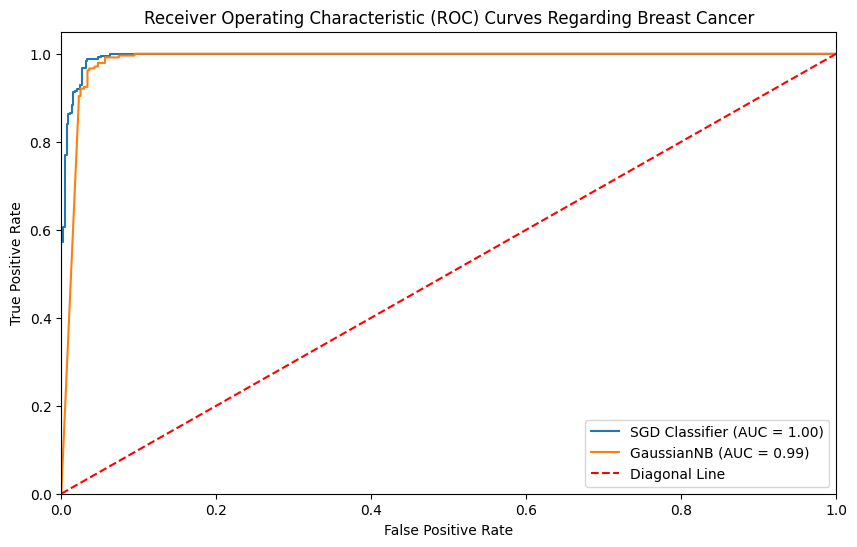

In [ ]:
# Compute the ROC curves and AUC values for SGDClassifier
fpr_sgd, tpr_sgd, _ = roc_curve(y, y_sgd_pred)
roc_auc_sgd = roc_auc_score(y, y_sgd_pred)

# Compute the ROC curves and AUC values for GaussianNB
fpr_gnb, tpr_gnb, _ = roc_curve(y, y_gnb_pred)
roc_auc_gnb = roc_auc_score(y, y_gnb_pred)

# Plot roc_curves for both classifiers in one display
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, label=f'SGD Classifier (AUC = {roc_auc_sgd:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Diagonal Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves Regarding Breast Cancer')
plt.legend(loc="lower right")
plt.show()


Find the cross validation accuracy of the classifiers using cross_val_score.

In [ ]:
# Cross-validation accuracy
accuracy_sgd = cross_val_score(sgd_clf, X_scaled, y, cv=5, scoring='accuracy').mean()
accuracy_gnb = cross_val_score(gnb_clf, X_scaled, y, cv=5, scoring='accuracy').mean()

print(f'SGD Classifier Cross-Validation Accuracy: {accuracy_sgd:.2f}')
print(f'GaussianNB Cross-Validation Accuracy: {accuracy_gnb:.2f}')

SGD Classifier Cross-Validation Accuracy: 0.97
GaussianNB Cross-Validation Accuracy: 0.96


<br><br><br>
Produce the classification report and the confusion matrix.

In [ ]:
# function to get classification report and confusion matrix
def get_confusion_matrix_and_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    return cm, report

sgd_cm, sgd_report = get_confusion_matrix_and_report(y, y_sgd_pred > 0)
gnb_cm, gnb_report = get_confusion_matrix_and_report(y, y_gnb_pred > 0.5)

print("SGD Classifier Confusion Matrix:")
print(sgd_cm)
print("SGD Classifier Classification Report:")
print(sgd_report)

print("GaussianNB Confusion Matrix:")
print(gnb_cm)
print("GaussianNB Classification Report:")
print(gnb_report)

SGD Classifier Confusion Matrix:
[[432  12]
 [  8 231]]
SGD Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       444
           1       0.95      0.97      0.96       239

    accuracy                           0.97       683
   macro avg       0.97      0.97      0.97       683
weighted avg       0.97      0.97      0.97       683

GaussianNB Confusion Matrix:
[[423  21]
 [  7 232]]
GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       444
           1       0.92      0.97      0.94       239

    accuracy                           0.96       683
   macro avg       0.95      0.96      0.96       683
weighted avg       0.96      0.96      0.96       683



<br>**Part B [1 marks]**<br>


In this exercise we will be looking at the ROC curves and classification report for hypothetical classifiers. Skeleton code is provided below and the assessment for this section will be entirely off the answers given in the discussion.<br>

*Part 1 Of Skeleton Code Provided:*<br>

In [ ]:
# This function rotates the first two features by `angle` degrees, what it does in essence is
# to make the first two features relevant to the classification and while leaving the rest of the
# features irrelevant

def rotate_data(X,angle):
    angle=angle/180*np.pi # Convert angles to radians
    transform_array=np.eye(X.shape[1])
    transform_array[0,0]=np.cos(angle)
    transform_array[0,1]=np.sin(angle)
    transform_array[1,0]=-np.sin(angle)
    transform_array[1,1]=np.cos(angle)
    X=np.matmul(X,transform_array)
    return X

# Create some data, this is a "simple" classification problem. All this is, is a dataframe with
# 10000 observations and 30 features. Only the first feature is relevant for the classification
# the data is imbalanced, with `~thr` examples in the negative class, and `~1-thr` examples in the
# positive class. We intetionally make this an imbalanced dataset where y=1 is rare (1 in 20)
angle=30
no_dummy_feature=8
thr=0.95
X=np.random.rand(10000,no_dummy_feature+2)
y=X[:,0]>thr
X= rotate_data(X,angle) #by rotating the data, we make it such that the first 2 features are relevant
columns=['relevant_feature_1','relevant_feature_2']
for i in range(no_dummy_feature):
    columns.append('dummy_feature_'+str(i))
columns.append('class')
df = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)],axis=1),columns=columns)
df.info()

# plot the data and visualize it, observe that only the first 2 features are useful for the classification
# and for the other features, it is just noise
sns.pairplot(data=df,hue='class')


# Helper function because if you have to call something 50 times, you might as well write a function
def report_performance(y,y_pred,y_score,label=''):
    fpr,tpr,_=skmetric.roc_curve(y,y_score)
    roc_auc=skmetric.roc_auc_score(y,y_score)
    fig=plt.figure(figsize=(10,10))
    plt.plot(fpr,tpr, label=f'{label} auc={roc_auc:0.5}')
    plt.plot([0,1],[0,1], 'r:',label='reference curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(f'ROC curve for {label}')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,1.01])
    plt.legend()
    plt.show()
    cm = skmetric.confusion_matrix(y, y_pred, labels=[0,1])
    disp = skmetric.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()
    print(skmetric.classification_report(y,y_pred))

<br><br><br>
For the following four blocks of code, given under a), b), c) and d), comment about the ROC curve, and contrast that with the classification report.<br>
Point out anything that seems contradictory (i/e classification with high accuracies but poor AUC values) and explain in your own words why this may not be as contradictory as it seems.

a)<br>
> y_pred,y_score=coinflip_classifier(X,prob=0.5)<br>
report_performance(y,y_pred,y_score,label=f'Coin flip classifier (prob=0.5)')<br>
y_pred,y_score=coinflip_classifier(X,prob=1-thr)<br>
report_performance(y,y_pred,y_score,label=f'Coin flip classifier (prob={1-thr:0.4})')<br>

*Part 2 Of Skeleton Code Provided:*<br>

In [ ]:
# Let's define some dumb classifier, This is a random classifier that flips an unfair coin, and votes
# according to the result of the unfair coin, prob sets the probability that the classifier would vote
# for class '1'. The scores reported are meaningless (randomly generated)
def coinflip_classifier(X,prob=0.5):
    noQueries=X.shape[0]
    y_score=np.random.uniform(0,1,X.shape[0])
    y_pred = y_score>(1-prob)
    return y_pred,y_score

**Answer:**<br>
> The Coin flip classifier is randomly guessing because it has a prob=0.5. It should have an AUC value of around 0.5, which is indicative of poor performance. <br><br>The ROC curve should be a diagonal line connecting the bottom-left corner to the top-right corner, and I expect that the classification report would show balanced accuracy, since the classifier is essentially just making random guesses.

b)<br>
> y_pred,y_score=majority_class_classifier(X,y)<br>
report_performance(y,y_pred,y_score,label=f'Majority class classifier')<br>

*Part 3 Of Skeleton Code Provided:*<br>

In [ ]:
# This is another dumb classifier, it just votes according to the majority class, if there are more
# class=0 in the labels, it will always vote 0, otherwise it will always vote 1. The score reported
# is meaningless (it's always a large number). y_score bit looks a bit funky mainly to work-around
# some issues roc_curve will have when there is only a single score (it will only be a single point)
def majority_class_classifier(X,y):
    majClass=np.round(sum(y)/X.shape[0])
    y_pred=np.zeros(X.shape[0],dtype=int)+majClass
    y_score=np.ones(X.shape[0])*majClass
    y_score=majClass+0.000001*(1-2*y)
    return y_pred,y_score

**Answer:**<br>
> The ROC curve for the majority class classifier will be a diagonal line connecting the bottom-left corner to the top-right corner. This is because while the threshold for the classifying positive class increases the false positive rate and true positive rate will both increase proportionally, resulting in a straight line with a slope of 1.
<br>

> The classification report for the majority class classifier will show a high accuracy and low AUC.<br>
It is from this that the apparent contradiction stems. The majority class classifier has a high accuracy because it usually predicts the majority class, but since it never predicts the positive class, it doesn't capture any true positives which leads to a low AUC value.

c)<br>
> y_pred,y_score=ideal_classifier(X,thr=0.5,angle=angle)<br>
report_performance(y,y_pred,y_score,label=f'Ideal classifier (thr=0.5)')<br>
y_pred,y_score=ideal_classifier(X,thr=thr,angle=angle)<br>
report_performance(y,y_pred,y_score,label=f'Ideal classifier (thr={thr:0.3})')<br>


*Part 4 Of Skeleton Code Provided:*<br>

In [ ]:
# This is what the ideal classifier should look like, it returns y_pred according to the relevant feature
# (column 0), the score of the prediction is the distance of the point to the decision boundary
def ideal_classifier(X,thr=0.5,angle=30):
    angle=angle/180*np.pi
    y_score =X[:,0]*np.cos(angle)+X[:,1]*np.sin(angle)
    y_pred= y_score>thr
    return y_pred,y_score

**Answer:**<br>
The ROC curve for the ideal classifier will be a curve that starts from the bottom-left corner then swiftly rises before approaching the top-right corner. The AUC value for this ROC curve will be close to 1, indicating excellent performance.

The classification report for the ideal classifier should show high accuracy for both the positive and negative classes, because it can accurately predict them both due to the clear separation achieved by using the relevant features.
<br>
There is no apparent contradiction between the high accuracy and high AUC value for this classifier.

d)<br>
> y_pred,y_score=nonideal_classifier(X,thr=thr,noise=0.1)<br>
report_performance(y,y_pred,y_score,label=f'Realistic classifier (noise=0.1)')<br>
y_pred,y_score=nonideal_classifier(X,thr=thr,noise=1)<br>
report_performance(y,y_pred,y_score,label=f'Realistic classifier (noise=1)')<br>
y_pred,y_score=nonideal_classifier(X,thr=thr,noise=10)<br>
report_performance(y,y_pred,y_score,label=f'Realistic classifier (noise=10)')<br>

*Part 5 Of Skeleton Code Provided:*<br>

In [ ]:
# This is the same classifier with some noise added, you can control how much noise/confusion the classifier
# would have by changing the value of noise
def nonideal_classifier(X,thr=0.5, noise=0.01,angle=30):
    angle=angle/180*np.pi
    y_score =X[:,0]*np.cos(angle)+X[:,1]*np.sin(angle) +np.random.rand(X.shape[0])*noise-noise*(1-thr)
    y_pred=y_score>thr
    return y_pred,y_score

**Answer:**<br>
> The performance of the realistic classifier will grow poorer as noise increases, which would be reflected in both the ROC curve and the classification report. <br>
With low noise the ROC curve will be like the ideal classifier's curve, rising swiftly before approaching the top-right corner, but as noise increases this curve will grow less steep.<br>

> The classification report for will show high accuracy for all cases so long as the noise level is not high.<br>

> The apparent contradiction between high accuracy and decreasing AUC value as noise increases is because the added noise introduces uncertainty and blurs the clear separation between classes, which reflects in the decreasing AUC value.